<a href="https://colab.research.google.com/github/samikris/physicsprojects/blob/main/Project_4_Fitting_Breit_Wigner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fitting and the Breit-Wigner Distributions**

In [ ]:
# Create google drive folder for this lab
# Feel free to rename folders to your liking

from google.colab import drive
drive.mount('/content/drive')
!mkdir -p "/content/drive/My Drive/Python4Physics"
filepath="drive/My Drive/Python4Physics/"

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# Import needed python libraries

import matplotlib.pyplot as plt
import numpy as np
plt.rc('text', usetex=False) # set to false because Colab doesn't like latex :(
plt.rc('font', family='serif')

**Exercise 1: Breit-Wigner Distribution**

Here we consider particle distributions described by
a simplified version of a Breit-Wigner distribution
https://en.wikipedia.org/wiki/Relativistic_Breit%E2%80%93Wigner_distribution

In [ ]:
# Let's define some basic functions

# define pi from the numpy library
pi= np.pi

# Create a function that accepts a variable x and calculates the square root
def sqrt(x):
	# -- your code here ---

# Create a function that accepts a variable x and calculates the exponential
def exp(x)
	# -- your code here ---

# Create a funtion to calculate the Breit-Wigner parameters
def P_BW(M,Gamma,E):
	# -- your code here --- hint look at the slides
	return tmp3 / ( tmp1 + tmp2 )

IndentationError: expected an indented block after function definition on line 7 (<ipython-input-3-4dcf5a885665>, line 11)

In [ ]:
# Now lets Breit-Wigner distribution using some different values of Gamma
# Suggestion, try to recreate the plot from the slides
Es = np.arange(2,5,.01)
M = 2.5

# Example for 1 Gamma value
Gamma = 1
plt.plot(Es, P_BW(M,Gamma,Es),color='r')

# Plot some more gamma values
# -- your code here ---

# Set the plot limits
plt.xlim([min(Es), max(Es)])

# Save the plot to your google drive folder
plt.savefig(filepath+'BW_example.pdf',
				bbox_inches='tight',
				transparent=True)

NameError: name 'P_BW' is not defined

**Exercise 2: Intro To Fitting & "Goodness Of Fit"**

Fitting is the process by which we determine the value of the parameters, that best “fit” the data. Generate a "good fit" we need to define a measure that tells us how good the fit is for a given value. In other words, we want to minimize the distance from our expected value (Pi) and the measured value of our distribution (Yi).

scipy has many different routines for fitting, optimization, and root finding: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [ ]:
# Lets define some more function

# Chi Squared functions
def chi2_BW(M_Gamma):
	M,Gamma = M_Gamma
	Pis = P_BW(M,Gamma,Xs)

	chi20 = np.sum(pow((Pis-Ys)/sigs,2))
	dof = len(sigs)-2.0
	return chi20

def find_min_chi2_BW():
	M_Gamma_guess = [2.,1.0]
	from scipy import optimize
	M_Gamma = optimize.minimize(chi2_BW, M_Gamma_guess, method='nelder-mead')
	print("M_Gamma",M_Gamma)
	return M_Gamma.x

chi2_BW(M,Gamma) 2654.3886462049177
chi2_BW(M,Gamma) 2082.302323942967
chi2_BW(M,Gamma) 560.0567762506427


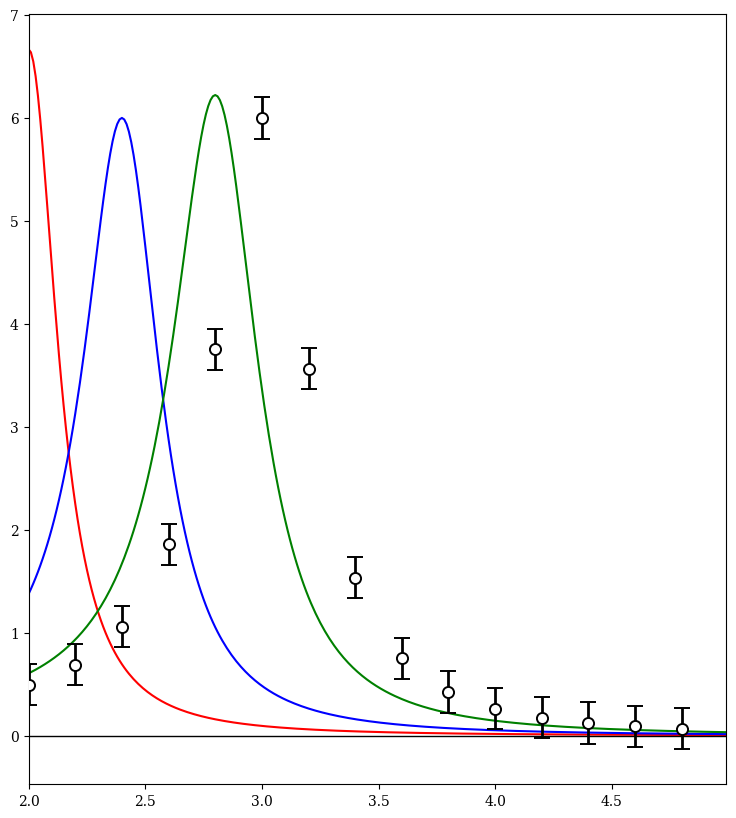

In [ ]:
# Create a figure
plt.figure(figsize=(9,10))

# Define constants
sig = .2
M = 3.0
Gamma = .5

# Define Xs, Ys, and sigs
Xs  = np.arange(2,5,.2)
Ys = # -- your code here ---  Hist use the P_BW function

# Make a list the same size as Xs but where each entry = sig
sigs = # -- your code here ---

# Plot the data and the error bars
plt.errorbar(Xs, Ys, yerr= sigs, markersize=8,fmt='o',color='k',mfc='white',mec='k', elinewidth=2, capsize=6, mew=1.4,zorder=10)

# Now guess some fit parameters
Es = np.arange(2,5,.01)
M = 2.0
Gamma = .3

print("chi2_BW(M,Gamma)",chi2_BW([M,Gamma]))
plt.plot(Es, P_BW(M,Gamma,Es),color='r')

# Guess some more fit parameters
M = # -- your code here ---
Gamma = # -- your code here ---
print("chi2_BW(M,Gamma)",chi2_BW([M,Gamma]))
plt.plot(Es, P_BW(M,Gamma,Es),color='b')

M = # -- your code here ---
Gamma = # -- your code here ---
print("chi2_BW(M,Gamma)",chi2_BW([M,Gamma]))
plt.plot(Es, P_BW(M,Gamma,Es),color='g')

# Q: How good is your Chi^2?

# Set your limits and save your figure
plt.xlim([min(Es), max(Es)])
plt.axhline(y=0,color='k',linewidth=1)
plt.savefig(filepath+'BW_example_2.pdf',
					bbox_inches='tight',
					transparent=True)


**Exercise 3: Fitting Without Guessing**

The goodness of fit, χ2, is a function of the parameters we wishing to determine. The optimal choice of parameters coincide with the minimum of the χ2. The hardest task is then to find the parameters that minimize it. One can try guessing, or generating random numbers, but in general we need something more systematic.

In [ ]:
# Function to change RGB colors to Hexadecimal colors
def rgb_to_hex(rgb):
	return '#%02x%02x%02x' % rgb

# Use plt to make a figure
plt.figure(figsize=(9,10))

# Define constants
sig = .2
M = 3.0
Gamma = .5

# Define your Xs, Ys, and sigs
Xs = # -- your code here ---
Ys = # -- your code here ---
sigs = # -- your code here ---


# Generate colors
Ns=4
for n0 in np.arange(Ns):
	Gamma = .1*n0+.2
	j0=n0/float(Ns)
	x=(1-j0)*47+j0*192
	y=(1-j0)*122+j0*39
	z=(1-j0)*121+j0*45
	# calc the hex color
	colorf= # -- your code here --- Hint use the rgb_to_hex function

	# Q: What happens when you change the constants?

	tmp =[]
	Ms= np.arange(2,5,.01)
	for M in Ms:
		chi20=chi2_BW([M,Gamma])
		tmp.append(chi20)
	#plt.errorbar(M, chi20, markersize=8,fmt='o',color=colorf,mfc='white',mec=colorf, elinewidth=2, capsize=6, mew=1.4,zorder=10)
	plt.plot(Ms,tmp,color=colorf)

	# Set limits for your plot
	plt.xlim # -- your code here ---
	plt.ylim # -- your code here ---

	# Add plot labels and save the figure
	# -- your code here ---

	plt.savefig(filepath+'BW_example_3.pdf',
					bbox_inches='tight',
					transparent=True)

SyntaxError: invalid syntax (<ipython-input-1-c581069a54c3>, line 27)

**Exercise 4: Python Routines for Minimization**

Load the data in Dropbox:/P4P_2024/project#4/fitting_data/BW_data.txt

M_Gamma        message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 2.1781384810732297e-05
             x: [ 3.000e+00  5.000e-01]
           nit: 55
          nfev: 103
 final_simplex: (array([[ 3.000e+00,  5.000e-01],
                       [ 3.000e+00,  5.001e-01],
                       [ 3.000e+00,  4.999e-01]]), array([ 2.178e-05,  3.023e-05,  6.726e-05]))


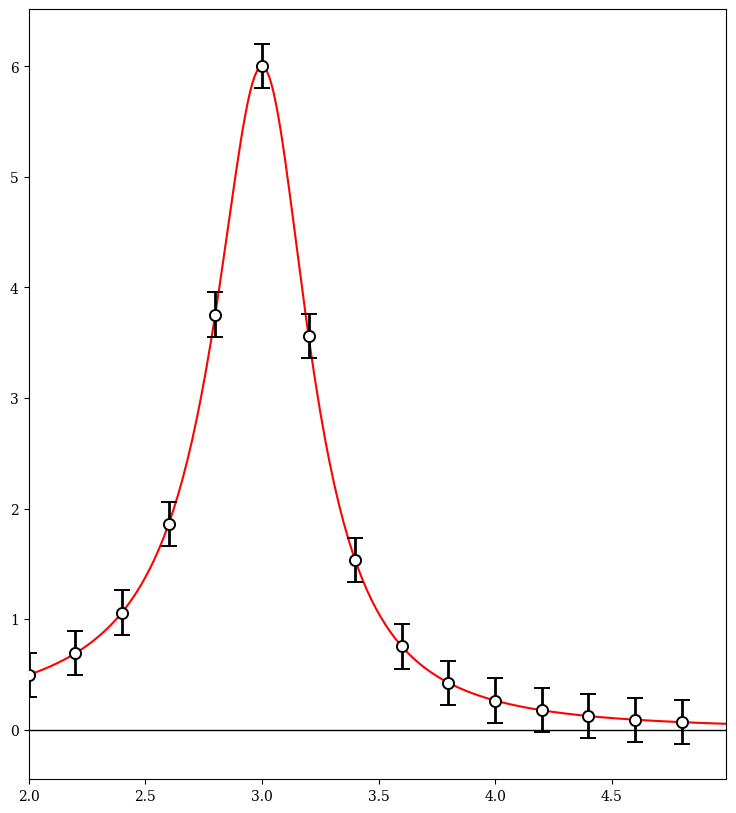

In [ ]:
plt.figure(figsize=(9,10))

M = 3.0
Gamma = .5
sig = .2

# Define your Xs, Ys, and sigs
Xs = # -- your code here ---
Ys = # -- your code here ---
sigs = # -- your code here ---

# Plot data with error bars
# -- your code here ---


M,Gamma = # -- your code here ---  Hint use you want the min chi^2, look at the fucntions you have
Es = np.arange(2,5,.01)
plt.plot(Es, P_BW(M,Gamma,Es),color='r')


plt.xlim([min(Es), max(Es)])
plt.axhline(y=0,color='k',linewidth=1)
plt.savefig(filepath+'BW_example_4.pdf',
					bbox_inches='tight',
					transparent=True)